In [66]:
import math
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import re
import seaborn as sns
import pandas as pd
import random
from scipy import stats  #t-test
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from scipy.interpolate import interp1d
from itertools import groupby
import glob
from scipy.signal import medfilt
from fastdtw import fastdtw
from sklearn.feature_selection import mutual_info_regression

In [67]:
#!pip3 install fastdtw

In [68]:
def newfolder(pathin):
    folder = os.path.exists(pathin)
    if not folder:
        os.makedirs(pathin)

In [69]:
pathsave='/Volumes/jiarui/hanako/plot_test' #path to save figures
if os.path.exists(pathsave)==False:
    newfolder(pathsave)

In [70]:
pathaudio_td = r"/Volumes/jiarui/hanako/audiomcut/td" #path to the audio_td folder
folders_td= sorted(os.listdir(pathaudio_td))

pathaudio_asd = r"/Volumes/jiarui/hanako/audiomcut/asd" #path to the audio_asd folder
folders_asd= sorted(os.listdir(pathaudio_asd))

In [71]:
print(folders_td[0])
print(folders_asd[0])

Addalyn
Alexander


In [72]:
def remove_(pathin): # this function is for removing hidden files in ios system
    for file in glob.glob(os.path.join(pathin, "._*")):
       try:
           os.remove(file)
           print(f"Deleted: {file}")
       except Exception as e:
           print(f"Error deleting {file}: {e}")

In [73]:
pathaudio_td_all = r"/Volumes/jiarui/hanako/audiom/TD" #path to the audio_td files
pathaudio_asd_all = r"/Volumes/jiarui/hanako/audiom/ASD" #path to the audio_td files
remove_(pathaudio_td_all)
remove_(pathaudio_asd_all)

In [74]:
def data_prepare(pathallin,pathin, folderin, idin): # Both parent and child audio are saved in the same folder with ID
                                                    # This function is for reading the parent and child audio files seperately
    audio_name=pathallin+'/'+folderin[idin]+'.wav'
    audio,sr=librosa.load(audio_name,sr=None)
    path_to_p= pathin+'/'+folderin[idin]+'/'+'PAR'
    remove_(path_to_p)
    files_p= sorted(os.listdir(path_to_p))
    path_to_c = pathin+'/'+folderin[idin]+'/'+'CHI'
    remove_(path_to_c)
    files_c= sorted(os.listdir(path_to_c))
    return audio,sr,path_to_p,path_to_c,files_p,files_c

In [75]:
audio_td,sr_td,path_to_p_td,path_to_c_td,files_p_td,files_c_td= data_prepare(pathaudio_td_all,pathaudio_td, folders_td, 0)
audio_asd,sr_asd,path_to_p_asd,path_to_c_asd,files_p_asd,files_c_asd= data_prepare(pathaudio_asd_all,pathaudio_asd, folders_asd, 0)

In [76]:
def f0fitinter(path,files,fminin,fmaxin,label): # This function is for extracting f0 and energy
    t1=[]
    t1e=[]
    for i in range(len(files)):
        x,sr1=librosa.load(path+"/"+files[i],sr=None)
        f0, voiced_flag, voiced_probs = librosa.pyin(x,sr=sr1,frame_length=512, fill_na=np.nan, n_thresholds=50, fmin=fminin, fmax=fmaxin)
        print(files[i])
        if (len(np.where(f0>10)[0]))<1:
            print(files[i])
            continue
        energy = librosa.feature.rms(y=x, frame_length=512, hop_length=128)[0]
        emean=np.round(np.nanmean(energy),decimals=2)
        emax=np.round(np.nanmax(energy),decimals=2)
        emin=np.round(np.nanmin(energy),decimals=2)
        erange=np.round(np.nanmax(energy)-np.nanmin(energy),decimals=2)
        f0mean=np.round(np.nanmean(f0),decimals=2)
        f0max=np.round(np.nanmax(f0),decimals=2)
        f0min=np.round(np.nanmin(f0),decimals=2)
        f0range=np.round(np.nanmax(f0)-np.nanmin(f0),decimals=2)
        starttime=np.array(files[i].split('.')[0])
        starttime = starttime.astype(float)
        label=label
        t=np.c_[starttime,f0mean,f0max,f0min,f0range,label] # Pitch features [mean, max, min, range], starttime is the start time of the audio clip, label is used for labeling parent/child
        te=np.c_[starttime,emean,emax,emin,erange,label] # Energy features [mean, max, min, range]
        t1.append(t)
        t1e.append(te)
    return np.array(t1)[:,0],np.array(t1e)[:,0]

In [77]:
pitch_p_td,energy_p_td=f0fitinter(path_to_p_td,files_p_td,180,500,0)
pitch_c_td,energy_c_td=f0fitinter(path_to_c_td,files_c_td,180,600,1)

pitch_p_asd,energy_p_asd=f0fitinter(path_to_p_asd,files_p_asd,180,500,0)
pitch_c_asd,energy_c_asd=f0fitinter(path_to_c_asd,files_c_asd,180,600,1)

119859.wav
124415.wav
127383.wav
130314.wav
132780.wav
135365.wav
135365.wav
137923.wav
141998.wav
149109.wav
158600.wav
177407.wav
184992.wav
190365.wav
194711.wav
196659.wav
197684.wav
201438.wav
206436.wav
210967.wav
212873.wav
220794.wav
220794.wav
227353.wav
231415.wav
237388.wav
241378.wav
254719.wav
269485.wav
272193.wav
274678.wav
276229.wav
282290.wav
284713.wav
291192.wav
296403.wav
298064.wav
304881.wav
312012.wav
322946.wav
332197.wav
337545.wav
340271.wav
350743.wav
357247.wav
361696.wav
371546.wav
383449.wav
383449.wav
398896.wav
436320.wav
441696.wav
444750.wav
452011.wav
455476.wav
461687.wav
122529.wav
125928.wav
129129.wav
139425.wav
143781.wav
154836.wav
159423.wav
180477.wav
183597.wav
193632.wav
195723.wav
195723.wav
202488.wav
209183.wav
212073.wav
216282.wav
228624.wav
230340.wav
232617.wav
239448.wav
247272.wav
256014.wav
256014.wav
257264.wav
261781.wav
264396.wav
265752.wav
271219.wav
271219.wav
272910.wav
279436.wav
281148.wav
283305.wav
294891.wav
294891.wav

In [78]:
def standardize(arr, ignore_nan=True): # Standardization
    if ignore_nan:
        mean_val = np.nanmean(arr)
        std_val = np.nanstd(arr)
    else:
        mean_val = np.mean(arr)
        std_val = np.std(arr)
    
    standardized_arr = (arr - mean_val) / std_val
    return standardized_arr

In [79]:
def format_and_plot_pitch_series(t1,t2): # format the pitch and energy features for a plotting purposes
    combined = np.vstack((t1, t2))
    combined[:, 0] = combined[:, 0].astype(float)
    sort_indices = np.argsort(combined[:, 0].astype(float))
    sorted_matrix = combined[sort_indices]
    is_mother = sorted_matrix[:, 5] == 0
    is_child  = sorted_matrix[:, 5] == 1
    
    # Extract feature columns (columns 1 to 4) for mothers and children and convert to float.
    mothers_features = sorted_matrix[is_mother, 1:5].astype(float)
    children_features = sorted_matrix[is_child, 1:5].astype(float)    
    # Compute the mean of each feature (f0mean, f0max, f0min, f0range)
    mothers_mean = np.mean(mothers_features, axis=0)
    children_mean = np.mean(children_features, axis=0)
    # Create copies for the new matrices
    new_mother_matrix = sorted_matrix.copy()
    new_child_matrix = sorted_matrix.copy()
    new_mother_matrix_nan = sorted_matrix.copy()
    new_child_matrix_nan = sorted_matrix.copy()    
    for col in range(1, 5):
        new_mother_matrix[is_child, col] = mothers_mean[col-1]
    for col in range(1, 5):
        new_child_matrix[is_mother, col] = children_mean[col-1]  
    standardized_matrix_m = new_mother_matrix.copy()
    standardized_matrix_c = new_child_matrix.copy()
    for col in range(5):
        # Convert the column to float in case it is stored as objects or strings.
        col_data = standardized_matrix_m[:, col].astype(float)
        standardized_matrix_m[:, col] = standardize(col_data)
    for col in range(5):
        # Convert the column to float in case it is stored as objects or strings.
        col_data = standardized_matrix_c[:, col].astype(float)
        standardized_matrix_c[:, col] = standardize(col_data)
    
    return new_mother_matrix, new_child_matrix,standardized_matrix_m,standardized_matrix_c #output the raw and standardized data

In [80]:
pitch_p_td_r,pitch_c_td_r,pitch_p_td_n,pitch_c_td_n=format_and_plot_pitch_series(pitch_p_td,pitch_c_td)
pitch_p_asd_r,pitch_c_asd_r,pitch_p_asd_n,pitch_c_asd_n=format_and_plot_pitch_series(pitch_p_asd,pitch_c_asd)

In [81]:
energy_p_td_r,energy_c_td_r,energy_p_td_n,energy_c_td_n=format_and_plot_pitch_series(energy_p_td,energy_c_td)
energy_p_asd_r,energy_c_asd_r,energy_p_asd_n,energy_c_asd_n=format_and_plot_pitch_series(energy_p_asd,energy_c_asd)

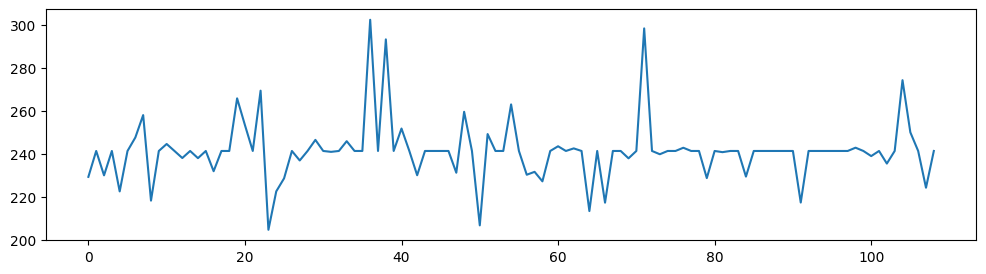

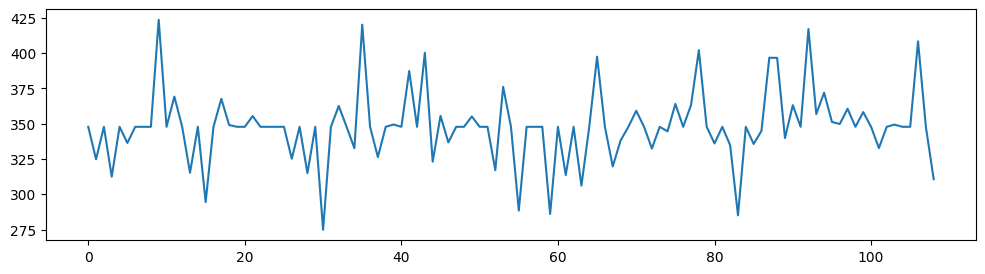

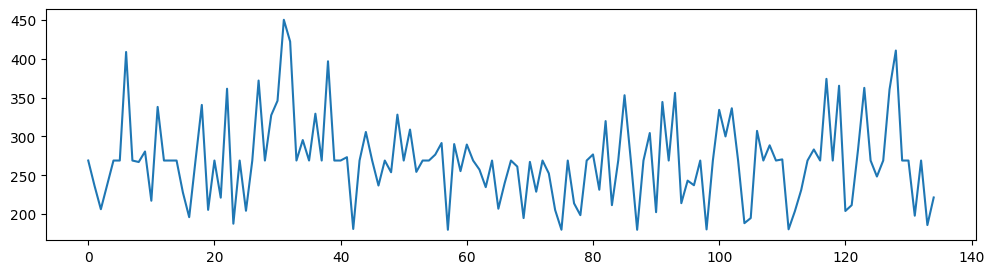

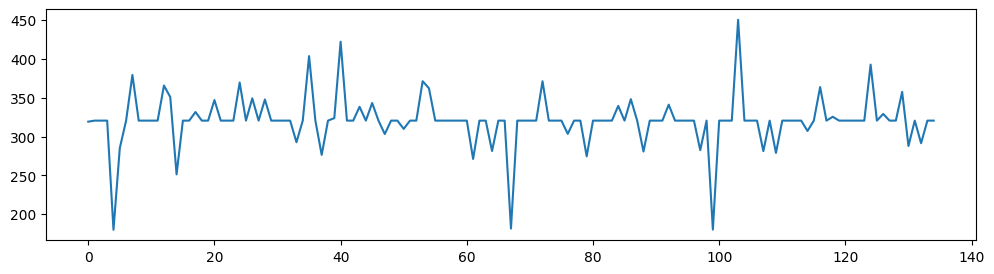

In [82]:
plt.figure(figsize=(12, 3)) #Plot the raw data
plt.plot(pitch_p_td_r[:,1])
plt.savefig(pathsave+'/'+'parent_raw_td_pmean_'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(pitch_c_td_r[:,1])
plt.savefig(pathsave+'/'+'child_raw_td_pmean_'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(pitch_p_asd_r[:,1])
plt.savefig(pathsave+'/'+'parent_raw_asd_pmean_'+folders_asd[0],bbox_inches='tight')
plt.show()
plt.figure(figsize=(12, 3))
plt.plot(pitch_c_asd_r[:,1])
plt.savefig(pathsave+'/'+'child_raw_td_pmean_'+folders_asd[0],bbox_inches='tight')
plt.show()

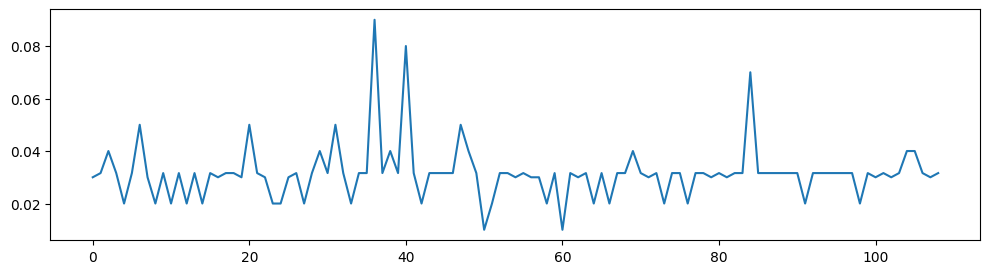

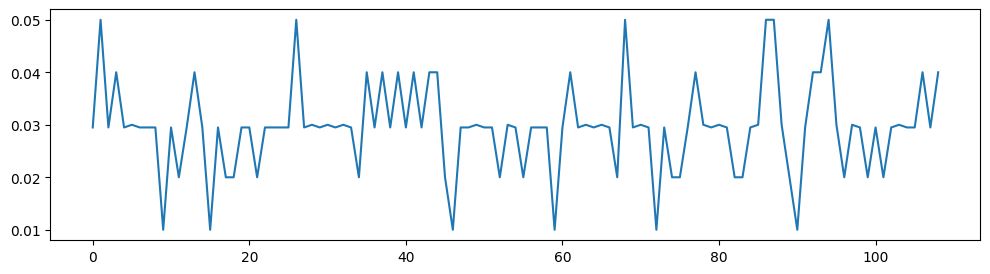

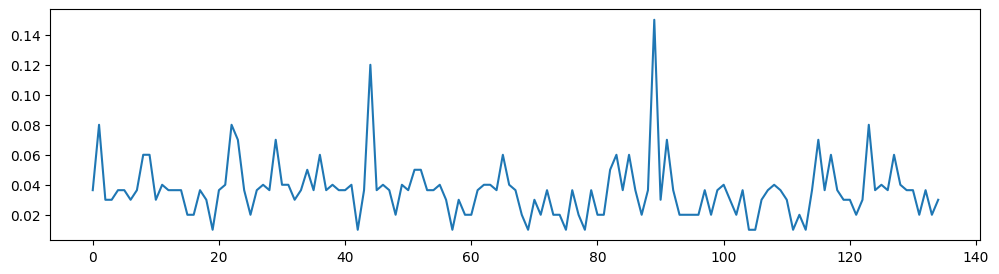

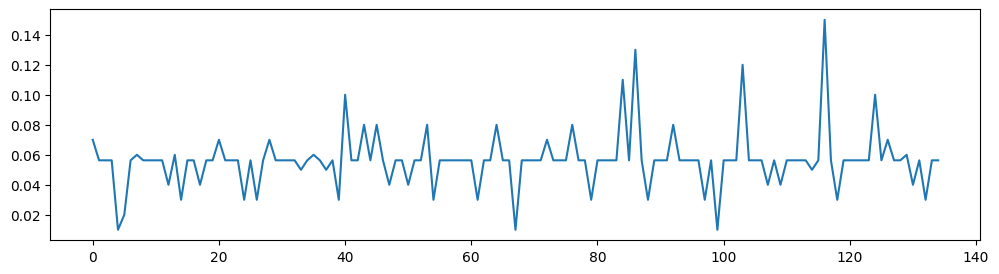

In [83]:
plt.figure(figsize=(12, 3)) 
plt.plot(energy_p_td_r[:,1])
plt.savefig(pathsave+'/'+'parent_raw_td_emean_'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(energy_c_td_r[:,1])
plt.savefig(pathsave+'/'+'child_raw_td_emean_'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(energy_p_asd_r[:,1])
plt.savefig(pathsave+'/'+'parent_raw_asd_emean_'+folders_asd[0],bbox_inches='tight')
plt.show()
plt.figure(figsize=(12, 3))
plt.plot(energy_c_asd_r[:,1])
plt.savefig(pathsave+'/'+'child_raw_td_emean_'+folders_asd[0],bbox_inches='tight')
plt.show()

In [84]:
def dtw_calculate(p_pitch,c_pitch): # calculate the dtw distance
    # Define a simple distance function for scalar values
    distance_func = lambda a, b: abs(a - b)
    # Compute the fastDTW distance and optimal alignment path using the normalized data
    distance, path = fastdtw(p_pitch, c_pitch, dist=distance_func)
    print("FastDTW distance (normalized)/duration:", distance/(len(p_pitch)))
    return distance, path

In [85]:
distance_td_f0mean,path_td_f0mean=dtw_calculate(pitch_p_td_n[:,1],pitch_c_td_n[:,1])
distance_asd_f0mean,path_asd_f0mean=dtw_calculate(pitch_p_asd_n[:,1],pitch_c_asd_n[:,1])

distance_td_f0max,path_td_f0max=dtw_calculate(pitch_p_td_n[:,2],pitch_c_td_n[:,2])
distance_asd_f0max,path_asd_f0max=dtw_calculate(pitch_p_asd_n[:,2],pitch_c_asd_n[:,2])

distance_td_f0min,path_td_f0min=dtw_calculate(pitch_p_td_n[:,3],pitch_c_td_n[:,3])
distance_asd_f0min,path_asd_f0min=dtw_calculate(pitch_p_asd_n[:,3],pitch_c_asd_n[:,3])

distance_td_f0range,path_td_f0range=dtw_calculate(pitch_p_td_n[:,4],pitch_c_td_n[:,4])
distance_asd_f0range,path_asd_f0range=dtw_calculate(pitch_p_asd_n[:,4],pitch_c_asd_n[:,4])

FastDTW distance (normalized)/duration: 0.5648823453579278
FastDTW distance (normalized)/duration: 0.5827887212256965
FastDTW distance (normalized)/duration: 0.5489481548291939
FastDTW distance (normalized)/duration: 0.5749998811398425
FastDTW distance (normalized)/duration: 0.5460139540626149
FastDTW distance (normalized)/duration: 0.5728643819322363
FastDTW distance (normalized)/duration: 0.5959247246912986
FastDTW distance (normalized)/duration: 0.5723098525079573


In [86]:
distance_td_emean,path_td_emean=dtw_calculate(energy_p_td_n[:,1],energy_c_td_n[:,1])
distance_asd_emean,path_asd_emean=dtw_calculate(energy_p_asd_n[:,1],energy_c_asd_n[:,1])

distance_td_emax,path_td_emax=dtw_calculate(energy_p_td_n[:,2],energy_c_td_n[:,2])
distance_asd_emax,path_asd_emax=dtw_calculate(energy_p_asd_n[:,2],energy_c_asd_n[:,2])

distance_td_emin,path_td_emin=dtw_calculate(energy_p_td_n[:,3],energy_c_td_n[:,3])
distance_asd_emin,path_asd_emin=dtw_calculate(energy_p_asd_n[:,3],energy_c_asd_n[:,3])

distance_td_erange,path_td_erange=dtw_calculate(energy_p_td_n[:,4],energy_c_td_n[:,4])
distance_asd_erange,path_asd_erange=dtw_calculate(energy_p_asd_n[:,4],energy_c_asd_n[:,4])

FastDTW distance (normalized)/duration: 0.46139614898338777
FastDTW distance (normalized)/duration: 0.529386933206554
FastDTW distance (normalized)/duration: 0.3753202935950879
FastDTW distance (normalized)/duration: 0.5262175186569618
FastDTW distance (normalized)/duration: 0.48814732467285143
FastDTW distance (normalized)/duration: 0.4595777532339912
FastDTW distance (normalized)/duration: 0.37840001725531486
FastDTW distance (normalized)/duration: 0.48489979515683246


In [87]:
def path_plot(pathin,p_pitch,c_pitch,folderin,idin,namein,distancein): #plot the path of the DTW matching
    path=np.array(pathin)
    pause_mask_parent = np.isnan(p_pitch)
    #print(len(np.where(pause_mask_parent==True)[0]))
    pause_mask_child  = np.isnan(c_pitch)
    parent_pauses_on_path = pause_mask_parent[path[:, 0]]
    child_pauses_on_path  = pause_mask_child[path[:, 1]]
    #print(len(np.where(parent_pauses_on_path==True)[0]))
    pause_on_path = parent_pauses_on_path | child_pauses_on_path
    # Now plot the warping path with a diagonal line for reference.
    plt.figure(figsize=(6, 6))
    plt.plot(path[:, 0], path[:, 1],  linestyle='-', label='Alignment Path')

    # Overlay markers where pauses occurred (blue 'x' markers)
    #plt.scatter(path[pause_on_path, 0], path[pause_on_path, 1],
            #color='orange', marker='x', s=5, label='Pauses (filled)')

    # Plot the diagonal line
    max_val = max(path[:, 0].max(), path[:, 1].max())
    plt.plot([0, max_val], [0, max_val], 'r--', label='Diagonal')

    plt.xlabel("Parent pitch index")
    plt.ylabel("Child pitch index")
    plt.title("FastDTW Optimal Alignment Path_"+namein+'_'+str(np.round(distancein,decimals=2)))
    plt.savefig(pathsave+'/'+'dtw'+namein+'_'+folderin[idin],bbox_inches='tight')
    plt.show()

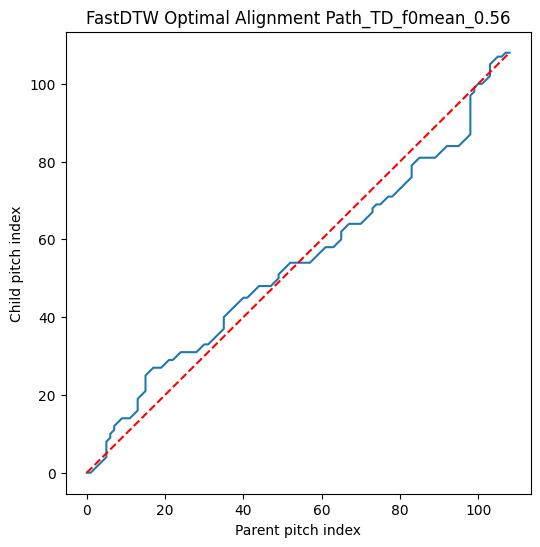

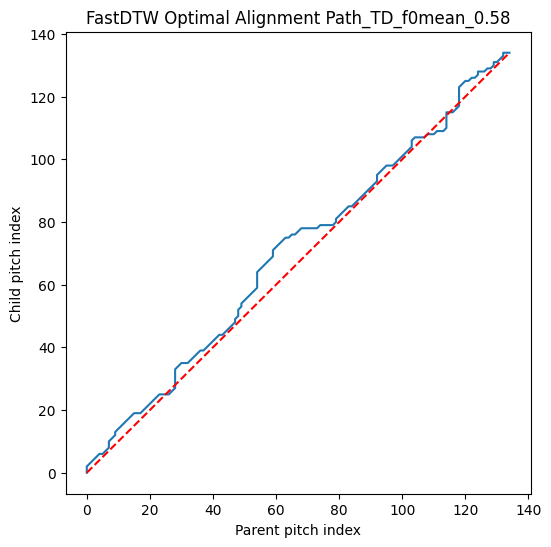

In [88]:
path_plot(path_td_f0mean,pitch_p_td_n[:,1],pitch_c_td_n[:,1],folders_td,0,'TD_f0mean',distance_td_f0mean/len(pitch_p_td_n[:,1]))
path_plot(path_asd_f0mean,pitch_p_asd_n[:,1],pitch_c_asd_n[:,1],folders_asd,0,'TD_f0mean',distance_asd_f0mean/len(pitch_p_asd_n[:,1]))

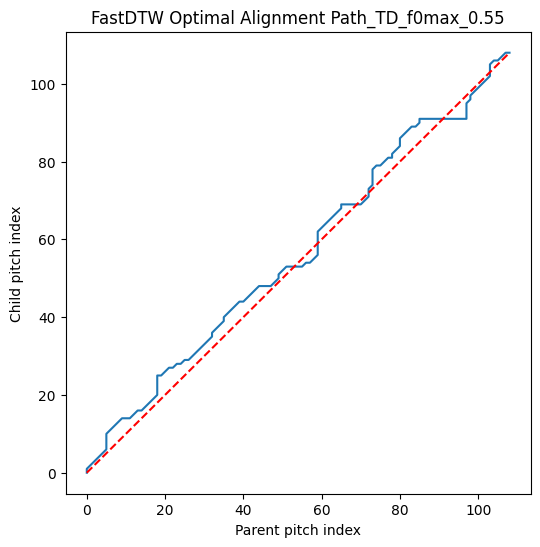

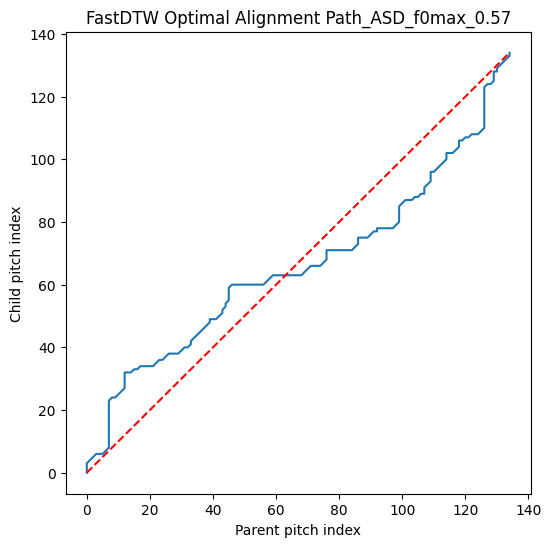

In [89]:
path_plot(path_td_f0max,pitch_p_td_n[:,2],pitch_c_td_n[:,2],folders_td,0,'TD_f0max',distance_td_f0max/len(pitch_p_td_n[:,2]))
path_plot(path_asd_f0max,pitch_p_asd_n[:,2],pitch_c_asd_n[:,2],folders_asd,0,'ASD_f0max',distance_asd_f0max/len(pitch_p_asd_n[:,2]))

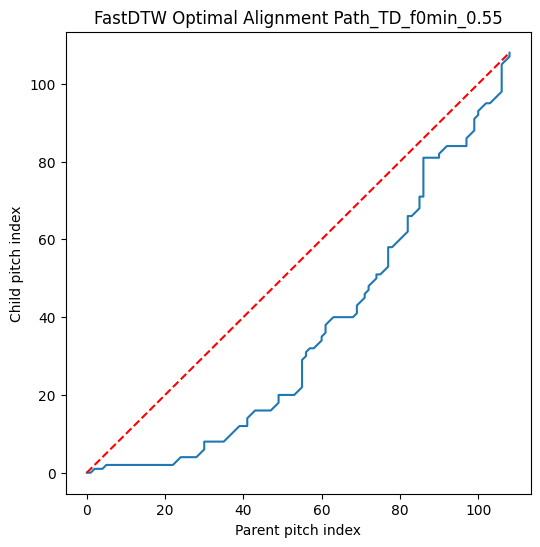

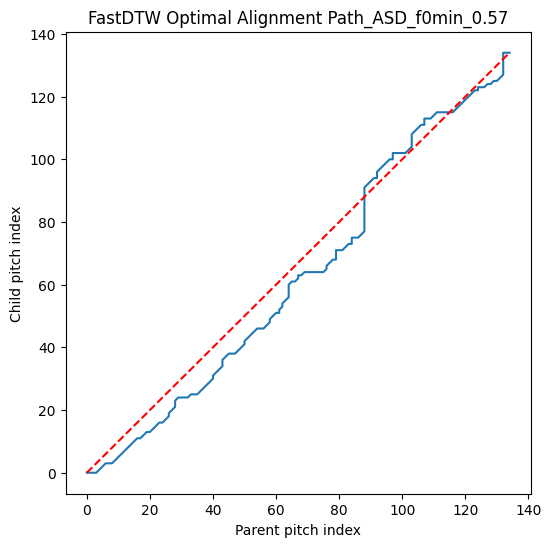

In [90]:
path_plot(path_td_f0min,pitch_p_td_n[:,3],pitch_c_td_n[:,3],folders_td,0,'TD_f0min',distance_td_f0min/len(pitch_p_td_n[:,3]))
path_plot(path_asd_f0min,pitch_p_asd_n[:,3],pitch_c_asd_n[:,3],folders_asd,0,'ASD_f0min',distance_asd_f0min/len(pitch_p_asd_n[:,3]))

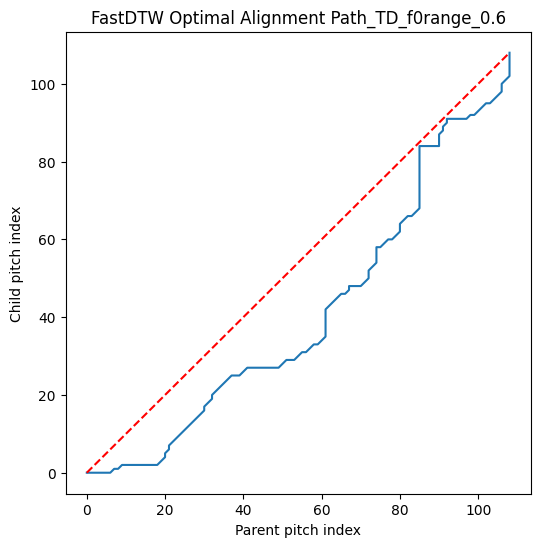

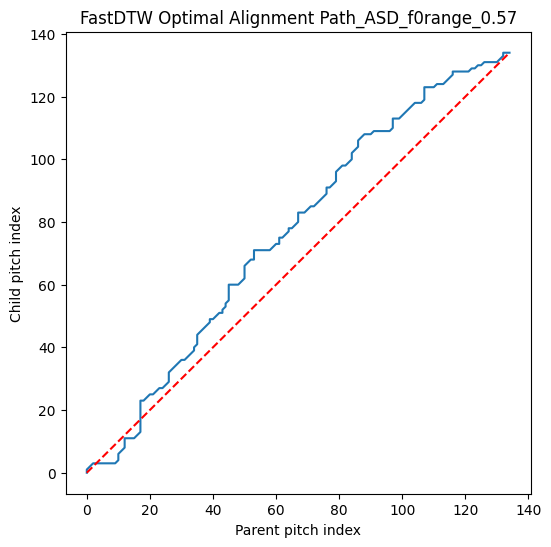

In [91]:
path_plot(path_td_f0range,pitch_p_td_n[:,4],pitch_c_td_n[:,4],folders_td,0,'TD_f0range',distance_td_f0range/len(pitch_p_td_n[:,4]))
path_plot(path_asd_f0range,pitch_p_asd_n[:,4],pitch_c_asd_n[:,4],folders_asd,0,'ASD_f0range',distance_asd_f0range/len(pitch_p_asd_n[:,4]))

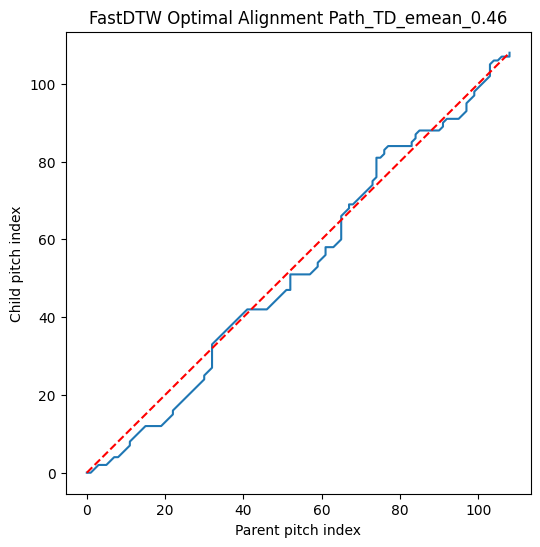

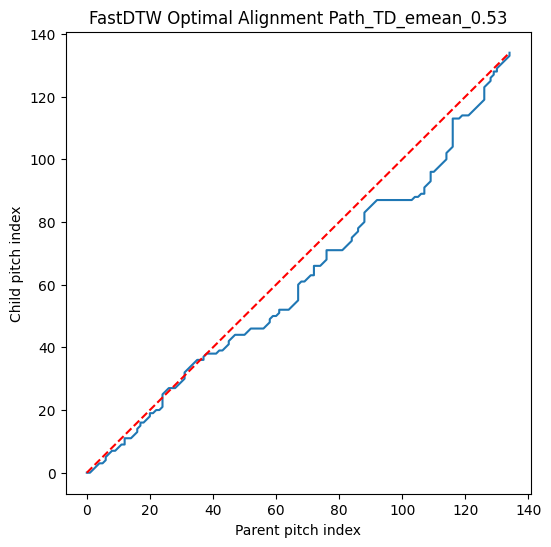

In [92]:
path_plot(path_td_emean,energy_p_td_n[:,1],energy_c_td_n[:,1],folders_td,0,'TD_emean',distance_td_emean/len(energy_p_td_n[:,1]))
path_plot(path_asd_emean,energy_p_asd_n[:,1],energy_c_asd_n[:,1],folders_asd,0,'TD_emean',distance_asd_emean/len(energy_p_asd_n[:,1]))

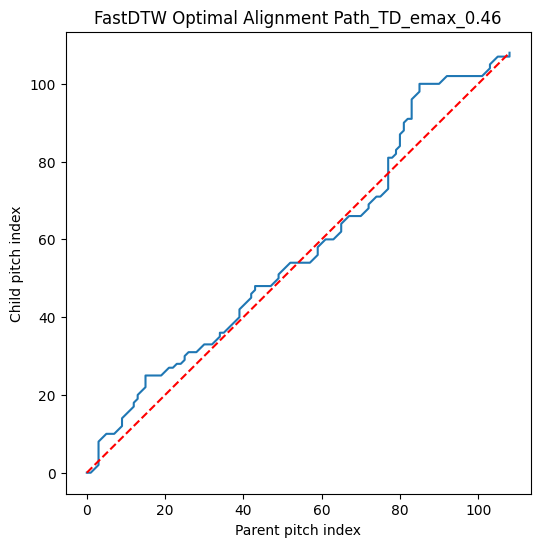

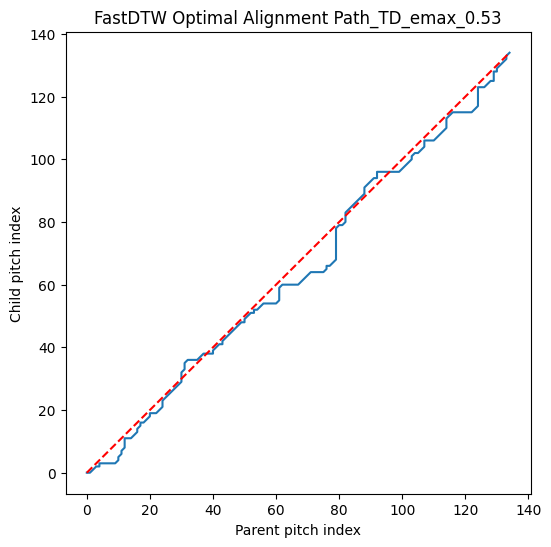

In [93]:
path_plot(path_td_emax,energy_p_td_n[:,2],energy_c_td_n[:,2],folders_td,0,'TD_emax',distance_td_emean/len(energy_p_td_n[:,2]))
path_plot(path_asd_emax,energy_p_asd_n[:,2],energy_c_asd_n[:,2],folders_asd,0,'TD_emax',distance_asd_emean/len(energy_p_asd_n[:,2]))

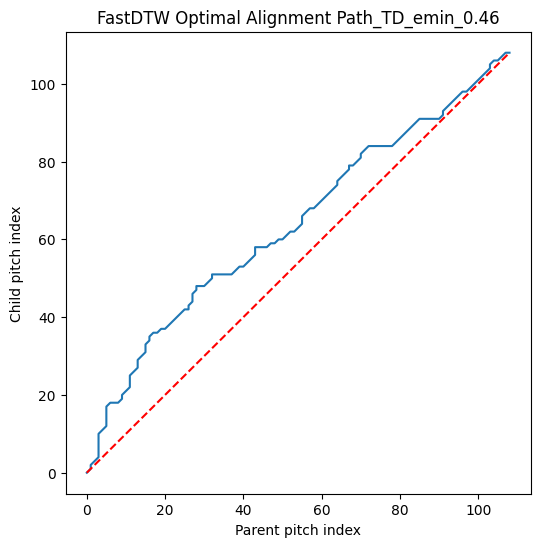

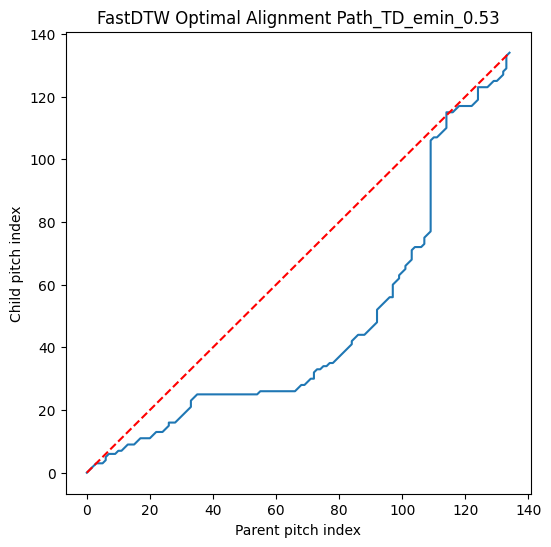

In [94]:
path_plot(path_td_emin,energy_p_td_n[:,3],energy_c_td_n[:,3],folders_td,0,'TD_emin',distance_td_emean/len(energy_p_td_n[:,3]))
path_plot(path_asd_emin,energy_p_asd_n[:,3],energy_c_asd_n[:,3],folders_asd,0,'TD_emin',distance_asd_emean/len(energy_p_asd_n[:,3]))

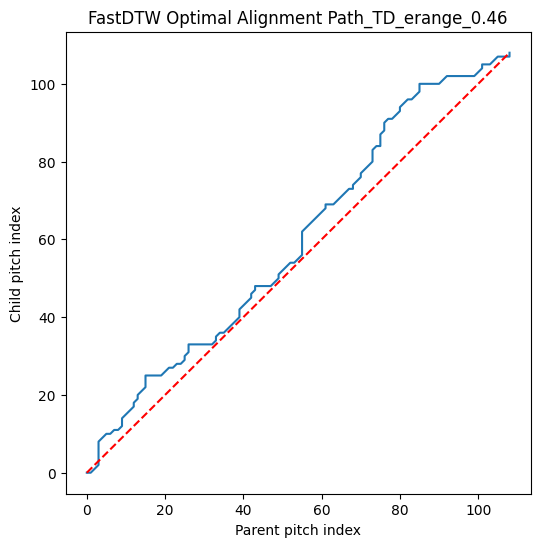

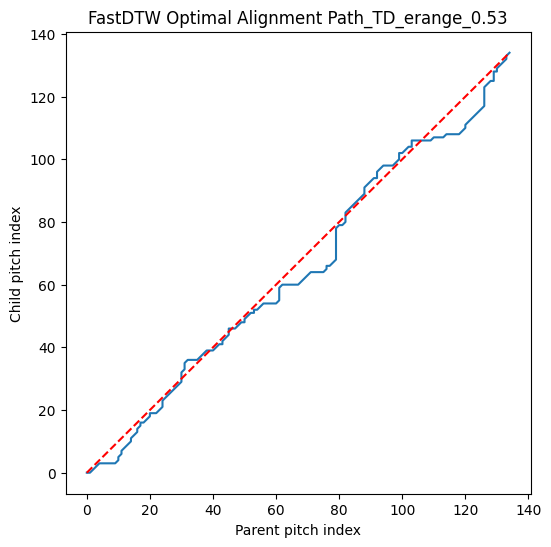

In [95]:
path_plot(path_td_erange,energy_p_td_n[:,4],energy_c_td_n[:,4],folders_td,0,'TD_erange',distance_td_emean/len(energy_p_td_n[:,4]))
path_plot(path_asd_erange,energy_p_asd_n[:,4],energy_c_asd_n[:,4],folders_asd,0,'TD_erange',distance_asd_emean/len(energy_p_asd_n[:,4]))

In [96]:
def plot_dtw_matching(series1, series2,pathin, offset=4): # plot the dtw matching. This is not for the analysis but only for visualization to confirm whether the matching is as expected
    
    # Create x-axis indices (assumes both series have the same length)
    n = len(series1)
    x = np.arange(n)
    
    # Prepare the plot: plot series1 (shifted upward) and series2
    plt.figure(figsize=(12, 8))
    plt.plot(x, series1 + offset, label="Parent (shifted upward)", color="blue")
    plt.plot(x, series2, label="Child", color="green")
    
    # For each matching pair in the warping path, draw a connecting line
    # Each pair (i, j) means that point i in series1 is matched with point j in series2.
    for i, j in pathin:
        plt.plot([i, j], [series1[i] + offset, series2[j]], color='gray', linewidth=0.5)
    
    plt.xlabel("Time index")
    plt.ylabel("Standardized Pitch")
    plt.title("DTW Matching between Two Time Series")
    #plt.legend()
    #plt.savefig(save_path, bbox_inches='tight')
    
    plt.show()


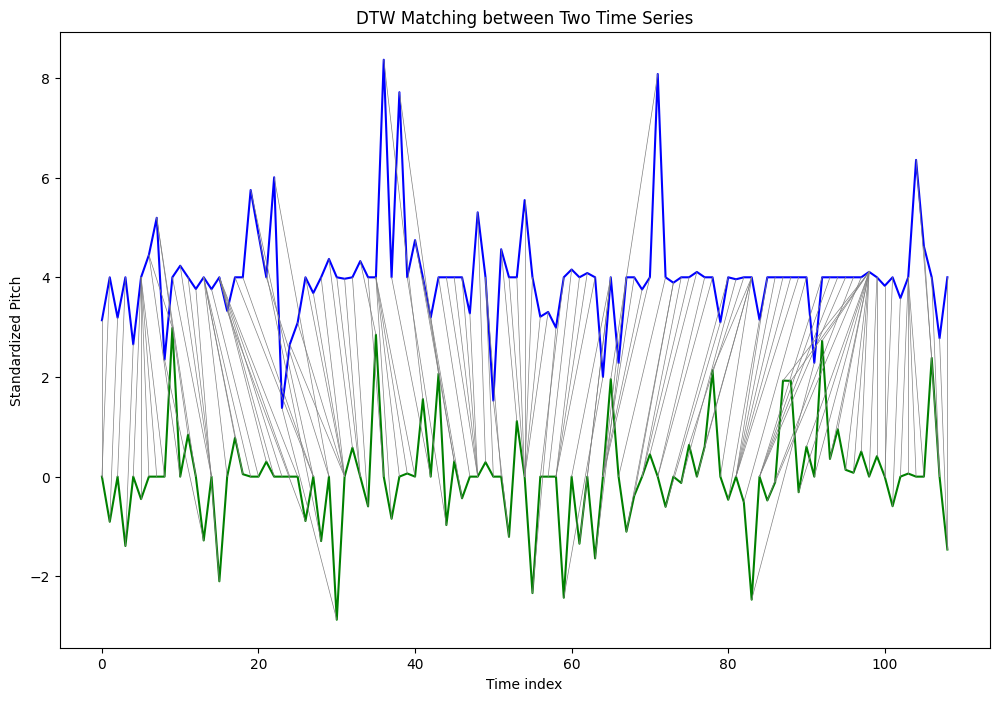

In [97]:
plot_dtw_matching(pitch_p_td_n[:,1],pitch_c_td_n[:,1], np.array(path_td_f0mean), offset=4)

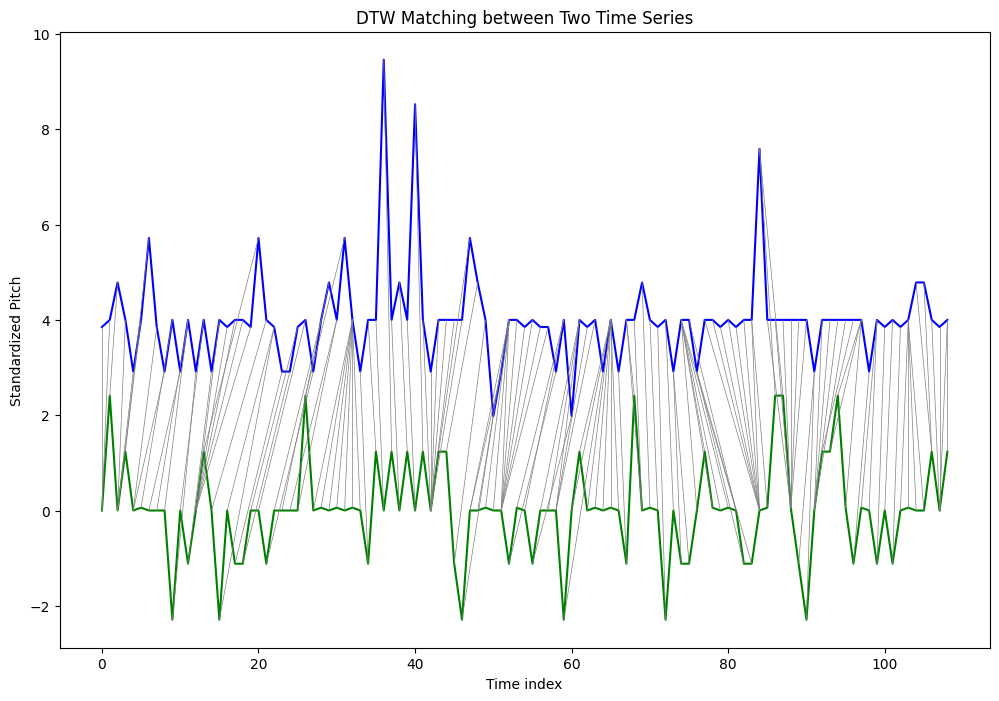

In [98]:
plot_dtw_matching(energy_p_td_n[:,1],energy_c_td_n[:,1], np.array(path_td_emean), offset=4)

In [99]:
def rolling_tlcc(series1, series2, window_size, max_lag): # rolling window cross-correlation
    correlations = []
    lags = range(-max_lag, max_lag + 1)
    
    for i in range(len(series1) - window_size + 1):
        window1 = series1[i:i + window_size]
        window2 = series2[i:i + window_size]
        
        # Compute cross-correlation for different lags
        cross_corr = []
        for lag in lags:
            if lag > 0:
                corr = np.corrcoef(window1[:-lag], window2[lag:])[0, 1] if len(window1[:-lag]) > 1 else np.nan
            elif lag < 0:
                corr = np.corrcoef(window1[-lag:], window2[:lag])[0, 1] if len(window1[-lag:]) > 1 else np.nan
            else:
                corr = np.corrcoef(window1, window2)[0, 1]
            cross_corr.append(corr)
        
        correlations.append(cross_corr)
    
    return pd.DataFrame(correlations, columns=lags)

In [100]:
tlcc_results_td_mean=rolling_tlcc(pitch_p_td_n[:,1],pitch_c_td_n[:,1], 50, 5)
tlcc_results_td_max=rolling_tlcc(pitch_p_td_n[:,2],pitch_c_td_n[:,2], 50, 5)
tlcc_results_td_min=rolling_tlcc(pitch_p_td_n[:,3],pitch_c_td_n[:,3], 50, 5)
tlcc_results_td_range=rolling_tlcc(pitch_p_td_n[:,4],pitch_c_td_n[:,4], 50, 5)

In [101]:
tlcc_results_td_mean_e=rolling_tlcc(energy_p_td_n[:,1],energy_c_td_n[:,1], 50, 5)
tlcc_results_td_max_e=rolling_tlcc(energy_p_td_n[:,2],energy_c_td_n[:,2], 50, 5)
tlcc_results_td_min_e=rolling_tlcc(energy_p_td_n[:,3],energy_c_td_n[:,3], 50, 5)
tlcc_results_td_range_e=rolling_tlcc(energy_p_td_n[:,4],energy_c_td_n[:,4], 50, 5)

In [102]:
tlcc_results_asd_mean=rolling_tlcc(pitch_p_asd_n[:,1],pitch_c_asd_n[:,1], 50, 5)
tlcc_results_asd_max=rolling_tlcc(pitch_p_asd_n[:,2],pitch_c_asd_n[:,2], 50, 5)
tlcc_results_asd_min=rolling_tlcc(pitch_p_asd_n[:,3],pitch_c_asd_n[:,3], 50, 5)
tlcc_results_asd_range=rolling_tlcc(pitch_p_asd_n[:,4],pitch_c_asd_n[:,4], 50, 5)

In [103]:
tlcc_results_asd_mean_e=rolling_tlcc(energy_p_asd_n[:,1],energy_c_asd_n[:,1], 50, 5)
tlcc_results_asd_max_e=rolling_tlcc(energy_p_asd_n[:,2],energy_c_asd_n[:,2], 50, 5)
tlcc_results_asd_min_e=rolling_tlcc(energy_p_asd_n[:,3],energy_c_asd_n[:,3], 50, 5)
tlcc_results_asd_range_e=rolling_tlcc(energy_p_asd_n[:,4],energy_c_asd_n[:,4], 50, 5)

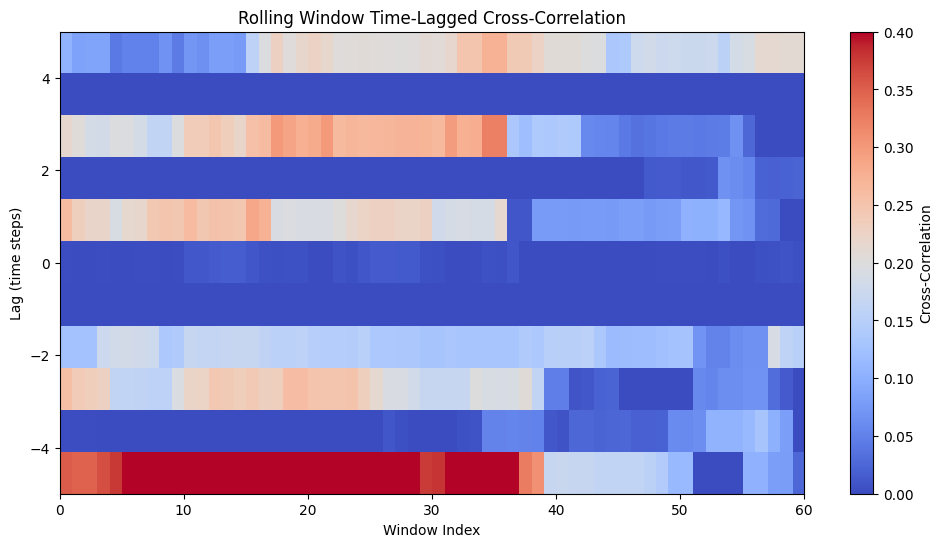

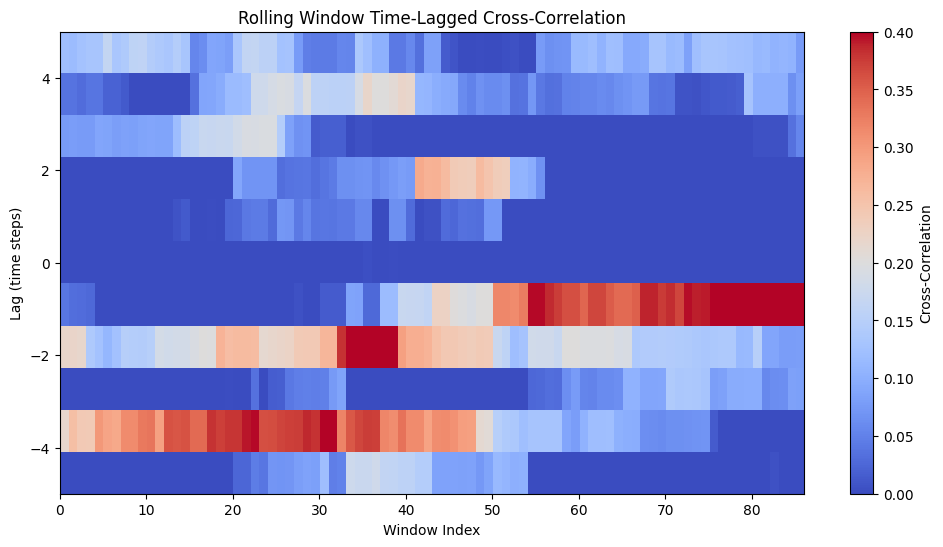

In [104]:
plt.figure(figsize=(12, 6)) #plot the cross-correlation results
plt.imshow(tlcc_results_td_mean.T, aspect='auto', cmap='coolwarm', extent=[0, len(tlcc_results_td_mean), -5, 5],vmin=0,vmax=0.4)
plt.colorbar(label="Cross-Correlation")
plt.xlabel("Window Index")
plt.ylabel("Lag (time steps)")
plt.title("Rolling Window Time-Lagged Cross-Correlation")
plt.savefig(pathsave+'/'+'tlcc_td_pmean_'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(tlcc_results_asd_mean.T, aspect='auto', cmap='coolwarm', extent=[0, len(tlcc_results_asd_mean), -5, 5],vmin=0,vmax=0.4)
plt.colorbar(label="Cross-Correlation")
plt.xlabel("Window Index")
plt.ylabel("Lag (time steps)")
plt.title("Rolling Window Time-Lagged Cross-Correlation")
plt.savefig(pathsave+'/'+'tlcc_asd_pmean_'+folders_asd[0],bbox_inches='tight')
plt.show()

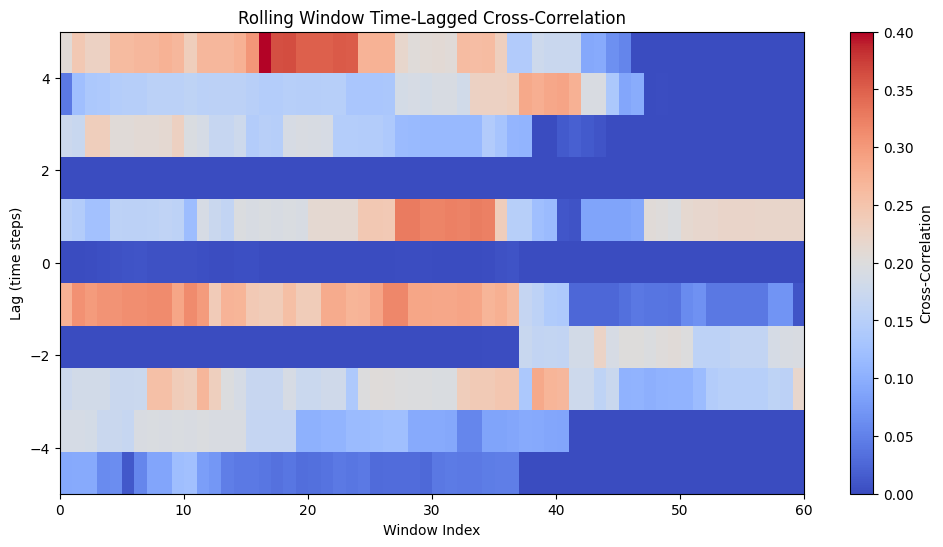

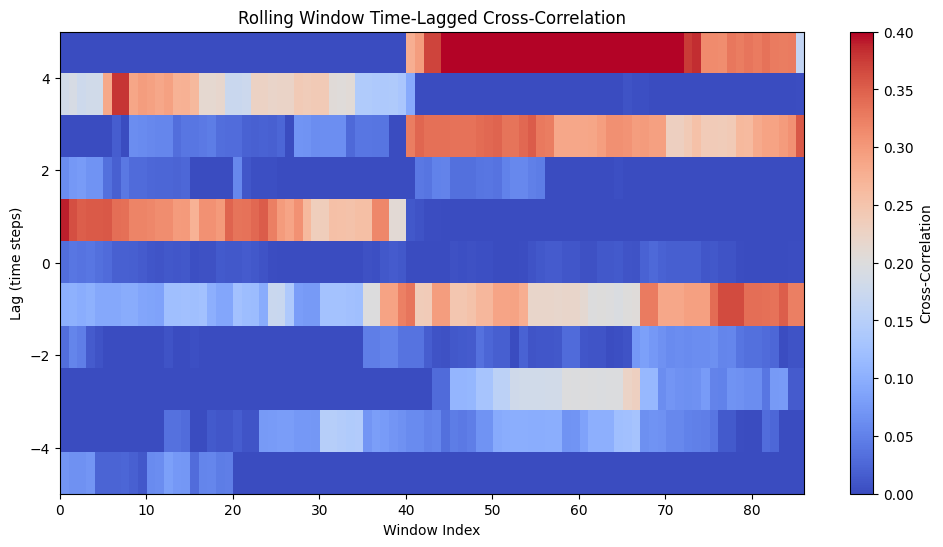

In [105]:
plt.figure(figsize=(12, 6))
plt.imshow(tlcc_results_td_mean_e.T, aspect='auto', cmap='coolwarm', extent=[0, len(tlcc_results_td_mean_e), -5, 5],vmin=0,vmax=0.4)
plt.colorbar(label="Cross-Correlation")
plt.xlabel("Window Index")
plt.ylabel("Lag (time steps)")
plt.title("Rolling Window Time-Lagged Cross-Correlation")
plt.savefig(pathsave+'/'+'tlcc_td_emean_'+folders_td[0],bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(tlcc_results_asd_mean_e.T, aspect='auto', cmap='coolwarm', extent=[0, len(tlcc_results_asd_mean_e), -5, 5],vmin=0,vmax=0.4)
plt.colorbar(label="Cross-Correlation")
plt.xlabel("Window Index")
plt.ylabel("Lag (time steps)")
plt.title("Rolling Window Time-Lagged Cross-Correlation")
plt.savefig(pathsave+'/'+'tlcc_asd_emean_'+folders_asd[0],bbox_inches='tight')
plt.show()

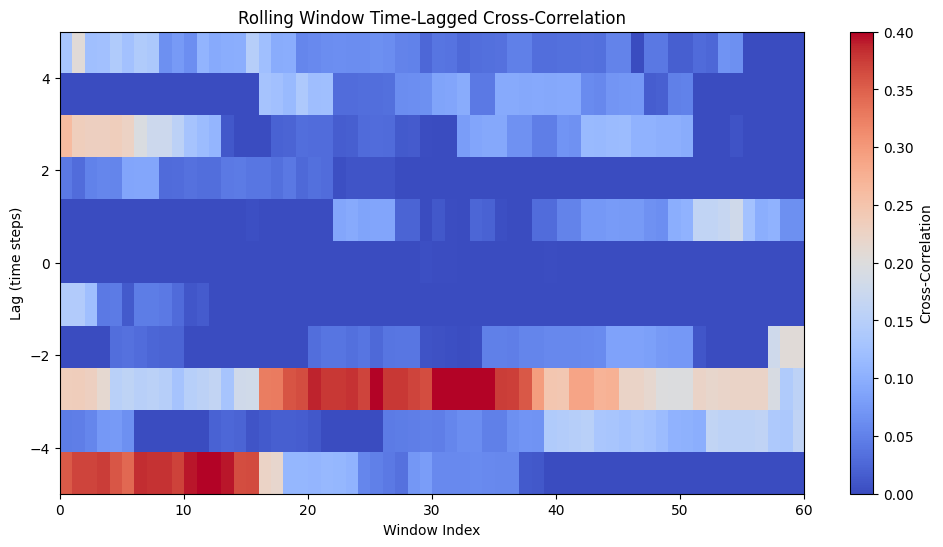

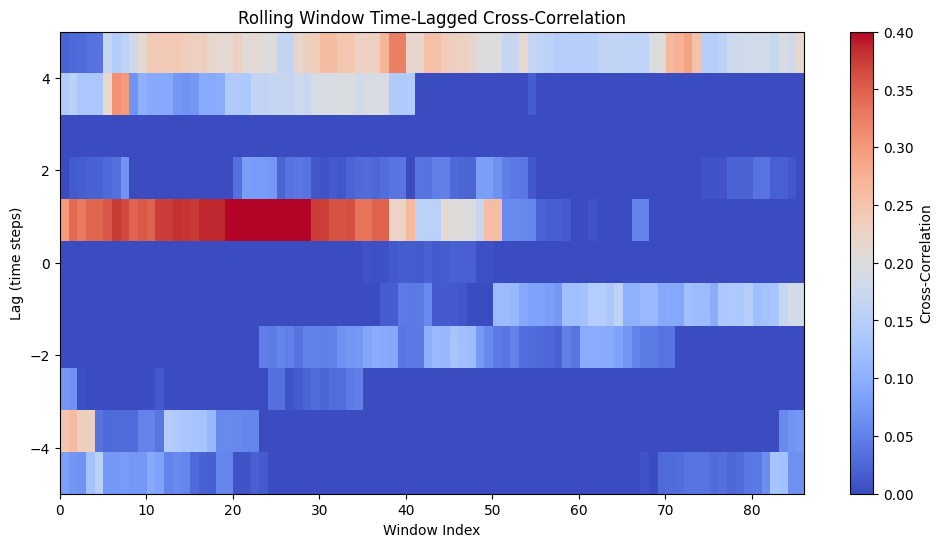

In [106]:
plt.figure(figsize=(12, 6))
plt.imshow(tlcc_results_td_range.T, aspect='auto', cmap='coolwarm', extent=[0, len(tlcc_results_td_range), -5, 5],vmin=0,vmax=0.4)
plt.colorbar(label="Cross-Correlation")
plt.xlabel("Window Index")
plt.ylabel("Lag (time steps)")
plt.title("Rolling Window Time-Lagged Cross-Correlation")
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(tlcc_results_asd_range.T, aspect='auto', cmap='coolwarm', extent=[0, len(tlcc_results_asd_range), -5, 5],vmin=0,vmax=0.4)
plt.colorbar(label="Cross-Correlation")
plt.xlabel("Window Index")
plt.ylabel("Lag (time steps)")
plt.title("Rolling Window Time-Lagged Cross-Correlation")
plt.show()

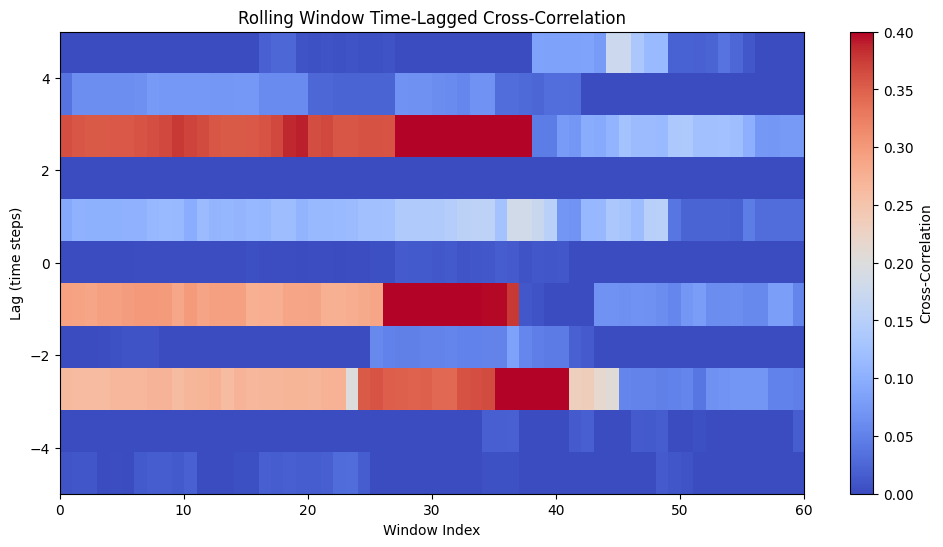

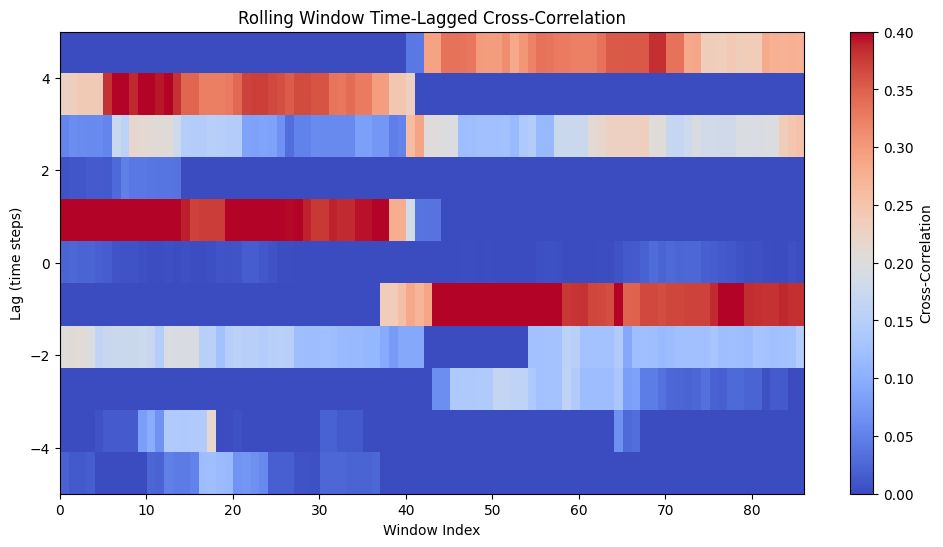

In [107]:
plt.figure(figsize=(12, 6))
plt.imshow(tlcc_results_td_range_e.T, aspect='auto', cmap='coolwarm', extent=[0, len(tlcc_results_td_range_e), -5, 5],vmin=0,vmax=0.4)
plt.colorbar(label="Cross-Correlation")
plt.xlabel("Window Index")
plt.ylabel("Lag (time steps)")
plt.title("Rolling Window Time-Lagged Cross-Correlation")
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(tlcc_results_asd_range_e.T, aspect='auto', cmap='coolwarm', extent=[0, len(tlcc_results_asd_range_e), -5, 5],vmin=0,vmax=0.4)
plt.colorbar(label="Cross-Correlation")
plt.xlabel("Window Index")
plt.ylabel("Lag (time steps)")
plt.title("Rolling Window Time-Lagged Cross-Correlation")
plt.show()

In [108]:
def normalize_with_mask(series):
    """Normalize a time series while ignoring NaN values."""
    valid_idx = ~np.isnan(series)  # Find non-NaN values
    series_norm = np.zeros_like(series) * np.nan  # Keep NaNs
    series_norm[valid_idx] = (series[valid_idx] - np.nanmin(series[valid_idx])) / (np.nanmax(series[valid_idx]) - np.nanmin(series[valid_idx]))
    return series_norm

def crp_analysis(series1, series2, threshold): #cross-recurrence plot
    N = len(series1)
    crp_matrix = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            if np.isnan(series1[i]) or np.isnan(series2[j]):
                crp_matrix[i, j] = np.nan  # Ignore NaN values
            else:
                distance = np.abs(series1[i]-series2[j])
                crp_matrix[i, j] = 1 if distance < threshold else 0

    return crp_matrix

In [109]:
pitch_p_td_nan=pitch_p_td_r.copy()
pitch_p_td_nan[np.where(np.abs(pitch_p_td_n[:,1])<0.00001)[0],1]=np.nan

pitch_p_asd_nan=pitch_p_asd_r.copy()
pitch_p_asd_nan[np.where(np.abs(pitch_p_asd_n[:,1])<0.00001)[0],1]=np.nan

pitch_c_td_nan=pitch_c_td_r.copy()
pitch_c_td_nan[np.where(np.abs(pitch_c_td_n[:,1])<0.00001)[0],1]=np.nan

pitch_c_asd_nan=pitch_c_asd_r.copy()
pitch_c_asd_nan[np.where(np.abs(pitch_c_asd_n[:,1])<0.00001)[0],1]=np.nan

In [110]:

pitch_p_td_nan[np.where(np.abs(pitch_p_td_n[:,4])<0.00001)[0],4]=np.nan


pitch_p_asd_nan[np.where(np.abs(pitch_p_asd_n[:,4])<0.00001)[0],4]=np.nan


pitch_c_td_nan[np.where(np.abs(pitch_c_td_n[:,4])<0.00001)[0],4]=np.nan


pitch_c_asd_nan[np.where(np.abs(pitch_c_asd_n[:,4])<0.00001)[0],4]=np.nan

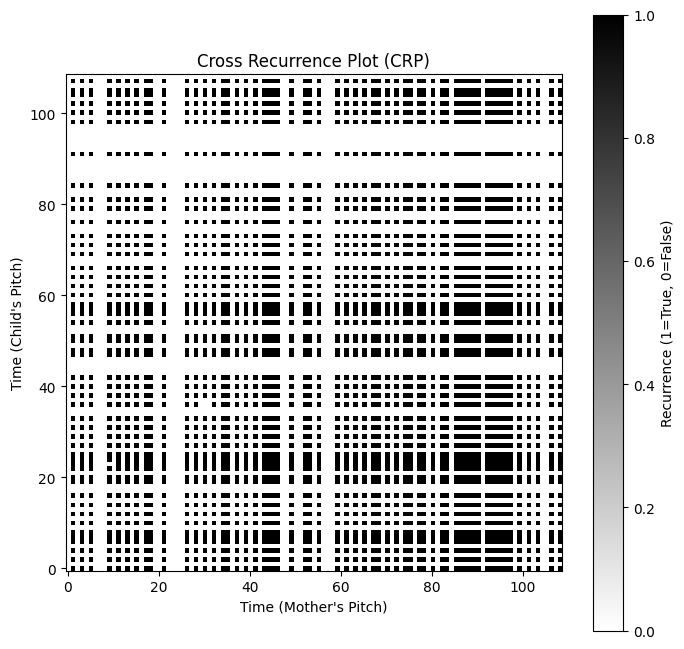

In [111]:
# Normalize time series
series1_norm = normalize_with_mask(pitch_p_td_nan[:,1])
series2_norm = normalize_with_mask(pitch_c_td_nan[:,1])

# Compute CRP with a chosen threshold
threshold = 1  # Adjust based on data range when the threshold is 1, it shows the CRP of vocal onset
crp_matrix = crp_analysis(series1_norm, series2_norm, threshold)

# Plot CRP
plt.figure(figsize=(8, 8))
plt.imshow(crp_matrix, cmap='binary', origin='lower')
plt.xlabel("Time (Mother's Pitch)")
plt.ylabel("Time (Child's Pitch)")
plt.title("Cross Recurrence Plot (CRP)")
plt.colorbar(label="Recurrence (1=True, 0=False)")
plt.savefig(pathsave+'/'+'crp_td_'+folders_td[0],bbox_inches='tight')
plt.show()

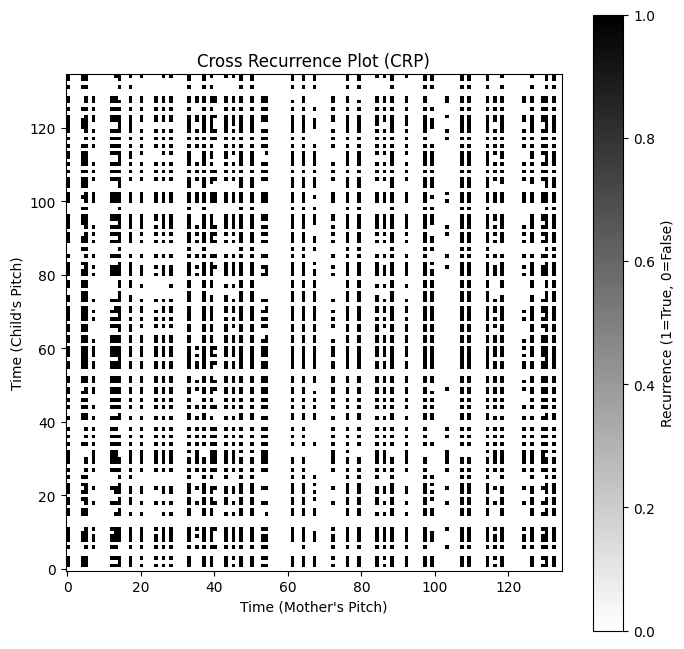

In [112]:
# Normalize time series
series1_norm = normalize_with_mask(pitch_p_asd_nan[:,1])
series2_norm = normalize_with_mask(pitch_c_asd_nan[:,1])

# Compute CRP with a chosen threshold
threshold = 0.5  # Adjust based on data range
crp_matrix = crp_analysis(series1_norm, series2_norm, threshold)

# Plot CRP
plt.figure(figsize=(8, 8))
plt.imshow(crp_matrix, cmap='binary', origin='lower')
plt.xlabel("Time (Mother's Pitch)")
plt.ylabel("Time (Child's Pitch)")
plt.title("Cross Recurrence Plot (CRP)")
plt.colorbar(label="Recurrence (1=True, 0=False)")
plt.savefig(pathsave+'/'+'crp_asd_'+folders_asd[0],bbox_inches='tight')
plt.show()

In [113]:
def compute_mutual_information(series1, series2, num_bins=10): #mutual information
    """
    Compute the mutual information between two time series.
    
    :param series1: First time series (e.g., mother's pitch).
    :param series2: Second time series (e.g., child's pitch).
    :param num_bins: Number of bins for discretization.
    :return: Mutual information score.
    """
    # Remove NaNs
    valid_idx = ~np.isnan(series1) & ~np.isnan(series2)
    series1, series2 = series1[valid_idx], series2[valid_idx]

    # Reshape for sklearn function
    series1 = series1.reshape(-1, 1)
    series2 = series2.reshape(-1, 1)

    # Compute Mutual Information
    mi_score = mutual_info_regression(series1, series2, discrete_features=False, n_neighbors=num_bins)
    
    return mi_score[0]  # MI value

In [114]:
def time_lagged_mutual_information(series1, series2, max_lag=10, num_bins=10): # time lag mutual information
    """
    Compute mutual information at different time lags.
    
    :param series1: First time series (e.g., mother's pitch).
    :param series2: Second time series (e.g., child's pitch).
    :param max_lag: Maximum lag to consider.
    :return: Array of mutual information values for each lag.
    """
    mi_scores = []
    lags = np.arange(-max_lag, max_lag + 1)

    for lag in lags:
        if lag > 0:
            mi = compute_mutual_information(series1[:-lag], series2[lag:], num_bins)
        elif lag < 0:
            mi = compute_mutual_information(series1[-lag:], series2[:lag], num_bins)
        else:
            mi = compute_mutual_information(series1, series2, num_bins)
        mi_scores.append(mi)

    return lags, np.array(mi_scores)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

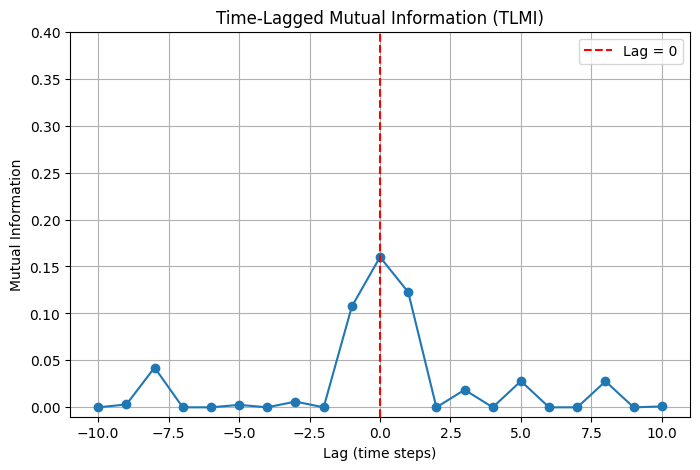

In [126]:

# Compute Time-Lagged Mutual Information
lags, mi_lagged = time_lagged_mutual_information(pitch_p_td_n[:,1], pitch_c_td_n[:,1])

# Plot Time-Lagged MI
plt.figure(figsize=(8, 5))
plt.plot(lags, mi_lagged, marker='o')
plt.ylim(-0.01,0.4)
plt.xlabel("Lag (time steps)")
plt.ylabel("Mutual Information")
plt.title("Time-Lagged Mutual Information (TLMI)")
plt.axvline(0, color='red', linestyle='--', label="Lag = 0")
plt.savefig(pathsave+'/'+'TLMI_td_pitch_mean_'+folders_td[0],bbox_inches='tight')
plt.legend()
plt.grid()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

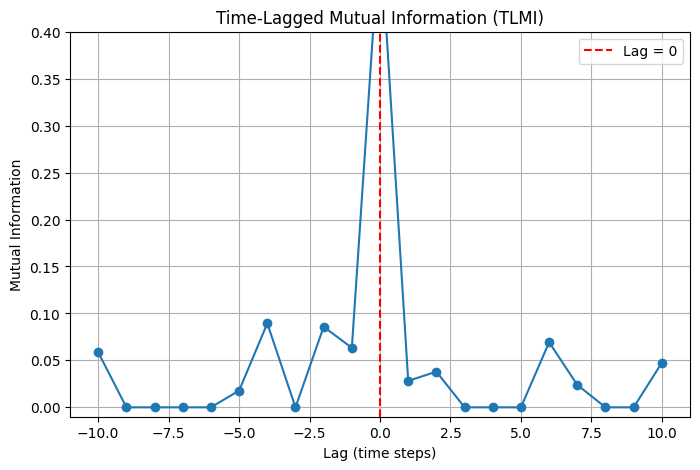

In [116]:
# Compute Time-Lagged Mutual Information
lags_e, mi_lagged_e = time_lagged_mutual_information(energy_p_td_n[:,1], energy_c_td_n[:,1])

# Plot Time-Lagged MI
plt.figure(figsize=(8, 5))
plt.plot(lags_e, mi_lagged_e, marker='o')
plt.ylim(-0.01,0.4)
plt.xlabel("Lag (time steps)")
plt.ylabel("Mutual Information")
plt.title("Time-Lagged Mutual Information (TLMI)")
plt.axvline(0, color='red', linestyle='--', label="Lag = 0")
plt.savefig(pathsave+'/'+'TLMI_asd_pitch_mean_'+folders_asd[0],bbox_inches='tight')
plt.legend()
plt.grid()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

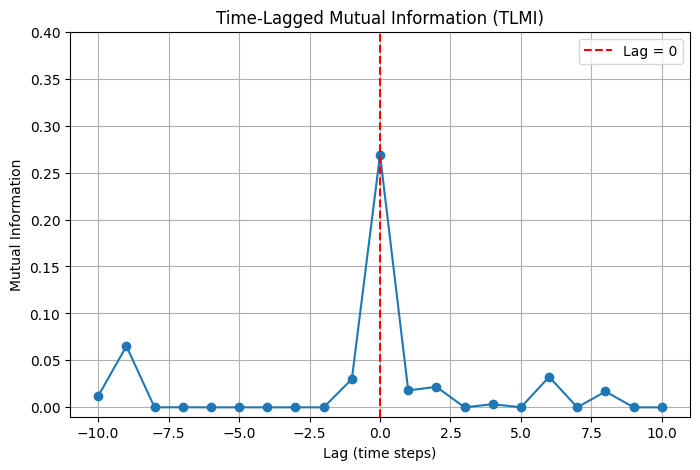

In [127]:

# Compute Time-Lagged Mutual Information
lags, mi_lagged = time_lagged_mutual_information(pitch_p_asd_n[:,1], pitch_c_asd_n[:,1])

# Plot Time-Lagged MI
plt.figure(figsize=(8, 5))
plt.plot(lags, mi_lagged, marker='o')
plt.ylim(-0.01,0.4)
plt.xlabel("Lag (time steps)")
plt.ylabel("Mutual Information")
plt.title("Time-Lagged Mutual Information (TLMI)")
plt.axvline(0, color='red', linestyle='--', label="Lag = 0")
plt.savefig(pathsave+'/'+'TLMI_td_energy_mean_'+folders_td[0],bbox_inches='tight')
plt.legend()
plt.grid()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/uti

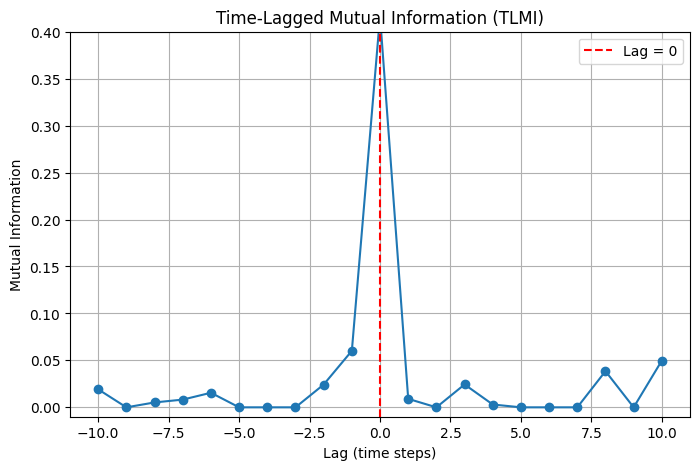

In [118]:

# Compute Time-Lagged Mutual Information
lags_e, mi_lagged_e = time_lagged_mutual_information(energy_p_asd_n[:,1], energy_c_asd_n[:,1])

# Plot Time-Lagged MI
plt.figure(figsize=(8, 5))
plt.plot(lags_e, mi_lagged_e, marker='o')
plt.ylim(-0.01,0.4)
plt.xlabel("Lag (time steps)")
plt.ylabel("Mutual Information")
plt.title("Time-Lagged Mutual Information (TLMI)")
plt.axvline(0, color='red', linestyle='--', label="Lag = 0")
plt.savefig(pathsave+'/'+'TLMI_asd_energy_mean_'+folders_asd[0],bbox_inches='tight')
plt.legend()
plt.grid()
plt.show()

In [119]:
#!pip3 install pycwt

In [120]:
import pycwt as wavelet  # Import the wavelet package
from pycwt.helpers import find
from scipy.ndimage import gaussian_filter

In [121]:
def smooth_wavelet_power(power, scales, sigma=1):
    """
    Custom function to smooth wavelet power using Gaussian filtering.
    
    :param power: Wavelet power spectrum (2D array).
    :param scales: Array of scales.
    :param sigma: Standard deviation for Gaussian smoothing.
    :return: Smoothed power spectrum.
    """
    smoothed = np.copy(power)
    for i in range(len(scales)):
        smoothed[i, :] = gaussian_filter(power[i, :], sigma)
    return smoothed

def cross_wavelet_analysis(series1, series2, dt=1.0): # cross wavelet analysis
    """
    Perform Cross-Wavelet Transform (XWT) and Wavelet Coherence (WTC).

    :param series1: First time series (e.g., mother's pitch).
    :param series2: Second time series (e.g., child's pitch).
    :param dt: Sampling period (default=1).
    :return: Wavelet coherence and cross-wavelet results.
    """
    # Remove NaNs (wavelet transform does not support NaNs)
    valid_idx = ~np.isnan(series1) & ~np.isnan(series2)
    series1, series2 = series1[valid_idx], series2[valid_idx]

    # Define the mother wavelet (Morlet)
    mother = wavelet.Morlet(6)

    # Define the smallest scale and number of scales
    s0 = 2 * dt  # Smallest resolvable scale
    dj = 1 / 12  # Frequency scale spacing
    J = int(7 / dj)  # Number of scales

    # Compute Continuous Wavelet Transform (CWT) for both signals
    wave1, scales, freqs, coi, _, _ = wavelet.cwt(series1, dt, dj=dj, s0=s0, J=J, wavelet=mother)
    wave2, _, _, _, _, _ = wavelet.cwt(series2, dt, dj=dj, s0=s0, J=J, wavelet=mother)

    # Compute Cross-Wavelet Transform (XWT)
    xwt = wave1 * np.conj(wave2)

    # Compute Wavelet Coherence (WTC) using Gaussian Smoothing
    s_wave1 = smooth_wavelet_power(np.abs(wave1) ** 2, scales)
    s_wave2 = smooth_wavelet_power(np.abs(wave2) ** 2, scales)
    s_xwt = smooth_wavelet_power(np.abs(xwt) ** 2, scales)
    coherence = s_xwt / (s_wave1 * s_wave2)  # Normalize coherence

    return coherence, freqs, coi

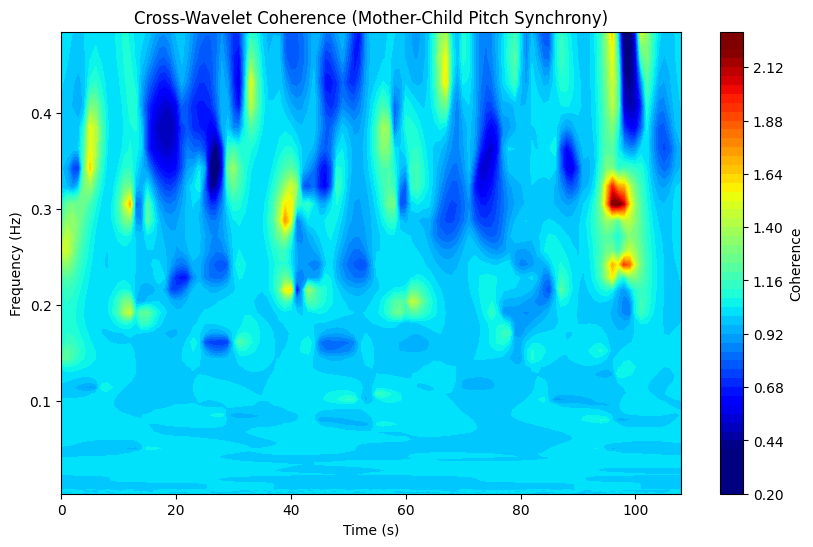

In [122]:
# Compute Cross-Wavelet Transform
coherence, freqs, coi = cross_wavelet_analysis(pitch_p_td_n[:,1], pitch_c_td_n[:,1])
time=np.arange(len(pitch_p_td_n[:,1]))
# Plot Wavelet Coherence (Time-Frequency Synchrony)
plt.figure(figsize=(10, 6))
plt.contourf(time, freqs, coherence, cmap="jet", levels=50,vmin=0.4,vmax=2.2)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Cross-Wavelet Coherence (Mother-Child Pitch Synchrony)")
plt.savefig(pathsave+'/'+'CWT_td_pitch_mean_'+folders_td[0],bbox_inches='tight')
plt.colorbar(label="Coherence")
plt.show()

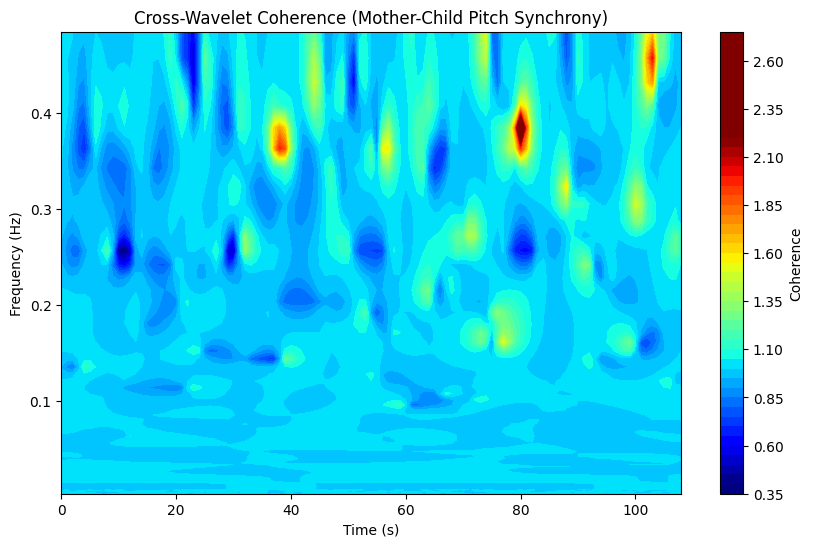

In [123]:
# Compute Cross-Wavelet Transform
coherence, freqs, coi = cross_wavelet_analysis(energy_p_td_n[:,1], energy_c_td_n[:,1])
time=np.arange(len(energy_p_td_n[:,1]))
# Plot Wavelet Coherence (Time-Frequency Synchrony)
plt.figure(figsize=(10, 6))
plt.contourf(time, freqs, coherence, cmap="jet", levels=50,vmin=0.4,vmax=2.2)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Cross-Wavelet Coherence (Mother-Child Pitch Synchrony)")
plt.savefig(pathsave+'/'+'CWT_asd_pitch_mean_'+folders_asd[0],bbox_inches='tight')
plt.colorbar(label="Coherence")
plt.show()

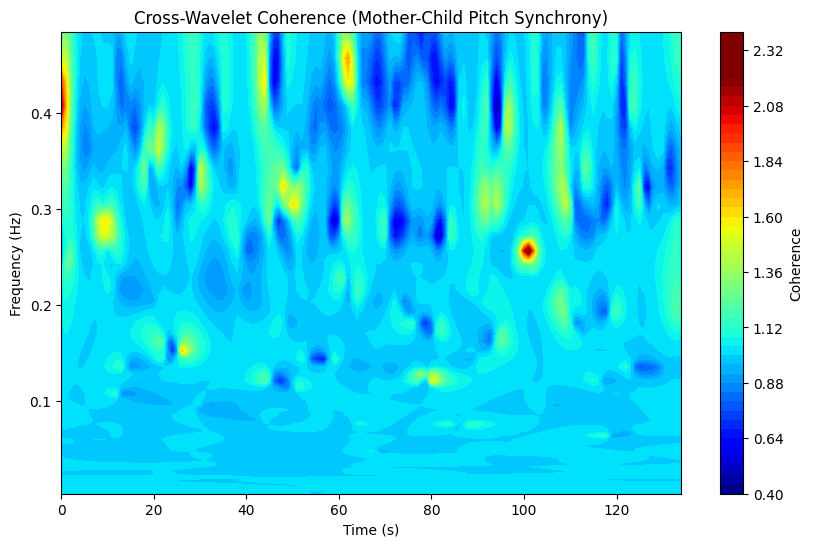

In [124]:
# Compute Cross-Wavelet Transform
coherence, freqs, coi = cross_wavelet_analysis(pitch_p_asd_n[:,1], pitch_c_asd_n[:,1])
time=np.arange(len(pitch_p_asd_n[:,1]))
# Plot Wavelet Coherence (Time-Frequency Synchrony)
plt.figure(figsize=(10, 6))
plt.contourf(time, freqs, coherence, cmap="jet", levels=50,vmin=0.4,vmax=2.2)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Cross-Wavelet Coherence (Mother-Child Pitch Synchrony)")
plt.savefig(pathsave+'/'+'CWT_td_energy_mean_'+folders_td[0],bbox_inches='tight')
plt.colorbar(label="Coherence")
plt.show()

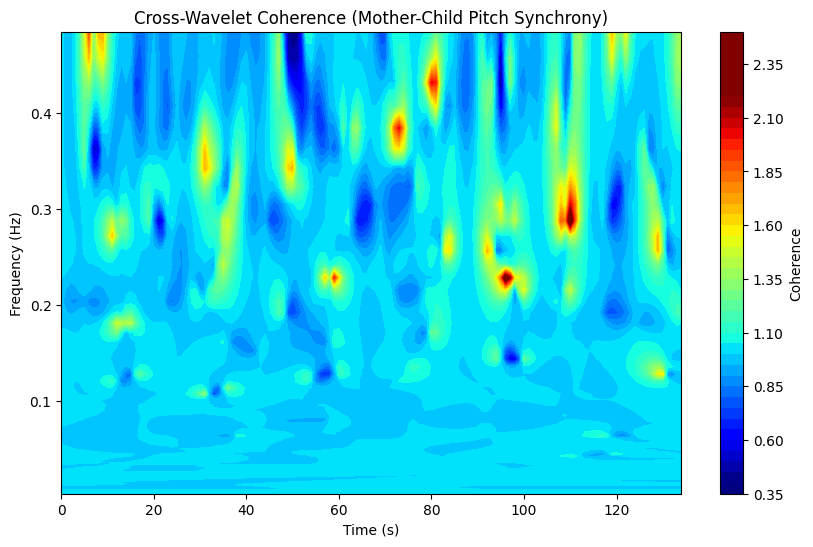

In [125]:
# Compute Cross-Wavelet Transform
coherence, freqs, coi = cross_wavelet_analysis(energy_p_asd_n[:,1], energy_c_asd_n[:,1])
time=np.arange(len(energy_p_asd_n[:,1]))
# Plot Wavelet Coherence (Time-Frequency Synchrony)
plt.figure(figsize=(10, 6))
plt.contourf(time, freqs, coherence, cmap="jet", levels=50,vmin=0.4,vmax=2.2)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Cross-Wavelet Coherence (Mother-Child Pitch Synchrony)")
plt.savefig(pathsave+'/'+'CWT_asd_energy_mean_'+folders_asd[0],bbox_inches='tight')
plt.colorbar(label="Coherence")
plt.show()